In [50]:
%matplotlib notebook

In [51]:
from CPclass import phone as CP
from Python_G_to_sec import main 
import matplotlib.pyplot as plt
import numpy as np

In [52]:
def Calculate_vector_Magnitude(Act_count_phone):

    x=Act_count_phone['axis1'].values**2
    y=Act_count_phone['axis2'].values**2
    z=Act_count_phone['axis3'].values**2
    m=x+y+z
    mm=np.array([np.sqrt(i) for i in m])
    
    return mm

### TO be changed according to path of folder 

In [53]:
#cooking
path_cooking1="d:\\Users\\al-abiad\\Desktop\\back_pain_mathilde\\23_06_21_Alex\\telephone\\v5_20210623_173550_738s.csv"

#cooking
path_cooking2="d:\\Users\\al-abiad\\Desktop\\back_pain_mathilde\\23_06_21_Alex\\telephone\\v5_20210623_175022_667s.csv"

#doing dishes
path_dishes="d:\\Users\\al-abiad\\Desktop\\back_pain_mathilde\\23_06_21_Alex\\telephone\\v5_20210623_180533_768s.csv"

#cleaning
path_cleaning="d:\\Users\\al-abiad\\Desktop\\back_pain_mathilde\\23_06_21_Alex\\telephone\\v5_20210623_182346_592s.csv"

#eating
path_eating="d:\\Users\\al-abiad\\Desktop\\back_pain_mathilde\\23_06_21_Alex\\telephone\\v5_20210623_183409_722s.csv"

#sleeping + toilet
path_sleeping_toilet="d:\\Users\\al-abiad\\Desktop\\back_pain_mathilde\\23_06_21_Alex\\telephone\\v5_20210623_185441_571s.csv"

## Reading data and interpolation

##### Change the path of the folder if you want to try another test

In [54]:
CP_data=CP(path_sleeping_toilet,app="sensor play")

rawacc=CP_data.acc_rawdata
rawgyro=CP_data.gyro_rawdata

In [55]:
rawacc.head()

,accelX(g),accelY(g),accelZ(g)
0.000,0.2788,-0.4125,-0.7744
0.003,0.2788,-0.4125,-0.7744
0.005,0.2788,-0.4125,-0.7744
0.007,0.2892,-0.3992,-0.7884
0.013,0.2875,-0.3971,-0.8225


In [56]:
CP_data.interpolategyrnacc(fs=30)

In [57]:
acc_interp=CP_data.acc_interp
gyro_interp=CP_data.gyro_interp

In [58]:
acc_interp.head()

,accelX(g),accelY(g),accelZ(g)
0.0000,0.27880,-0.41250,-0.77440
0.0333,0.27480,-0.39530,-0.90720
0.0667,0.30375,-0.38475,-0.98140
0.1000,0.33915,-0.34535,-1.06820
0.1333,0.23070,-0.21620,-0.91355


<IPython.core.display.Javascript object>


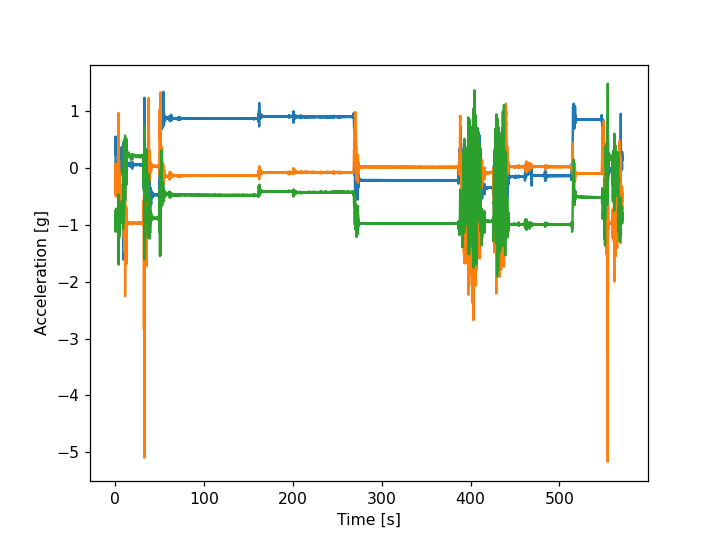

Text(0.5, 0, 'Time [s]')

In [59]:
plt.plot(acc_interp)
plt.ylabel('Acceleration [g]')
plt.xlabel('Time [s]')

## Calculation of activity Counts

In [60]:
acc_interp_renamed=acc_interp.rename(columns = {'accelX(g)': 'Accx', 'accelY(g)': 'Accy','accelZ(g)':'Accz'}, inplace = False)
Act_count_phone=main(acc_interp_renamed,filesf=30)

In [61]:
Act_count_phone.head()

,axis1,axis2,axis3
0,50,81,95
1,12,33,18
2,34,17,0
3,41,57,5
4,27,45,27


<IPython.core.display.Javascript object>


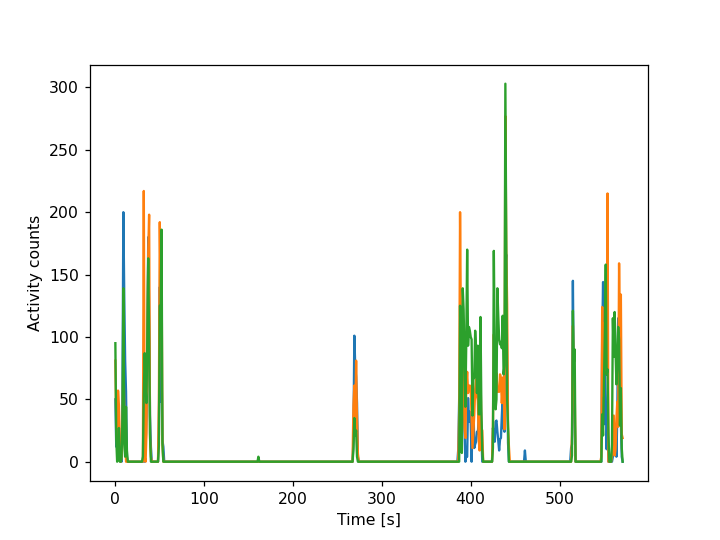

In [62]:
plt.figure()
plt.ylabel('Activity counts')
plt.xlabel('Time [s]')
plt.plot(Act_count_phone)

## Calculation of Vector Magnitude and total activity

In [63]:
vector_Magnitude=Calculate_vector_Magnitude(Act_count_phone)

<IPython.core.display.Javascript object>


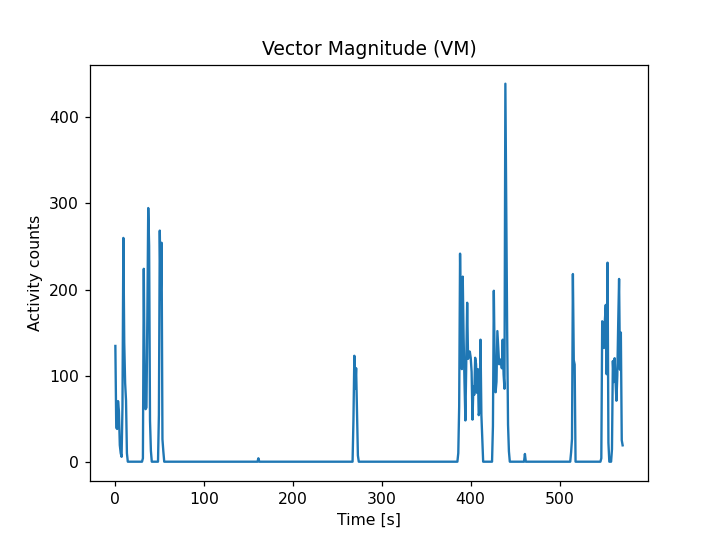

In [64]:
plt.figure()
plt.title('Vector Magnitude (VM)')
plt.ylabel('Activity counts')
plt.xlabel('Time [s]')
plt.plot(vector_Magnitude)

In [65]:
phone_total_activity= np.sum(vector_Magnitude>10)
print("the total activity recorded by the phone is %d"%phone_total_activity)

the total activity recorded by the phone is 103
